In [1]:
%matplotlib inline
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


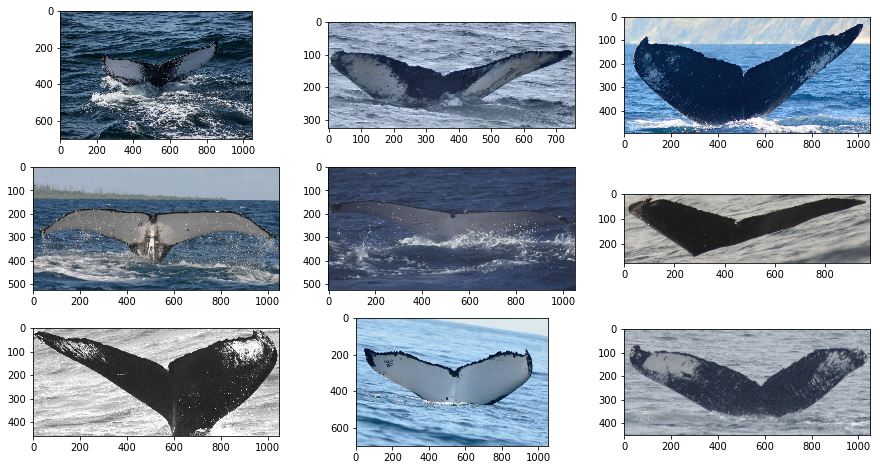

In [3]:
TRAIN = 'train'
path = os.path.abspath(TRAIN)

plt.figure(figsize = (15, 8))
idx=0
for img in os.listdir(path)[:9]:
    plt.subplot(3, 3, idx+1)
    image = mpimg.imread(os.path.join(path,img))    
    plt.imshow(image)
    idx+=1

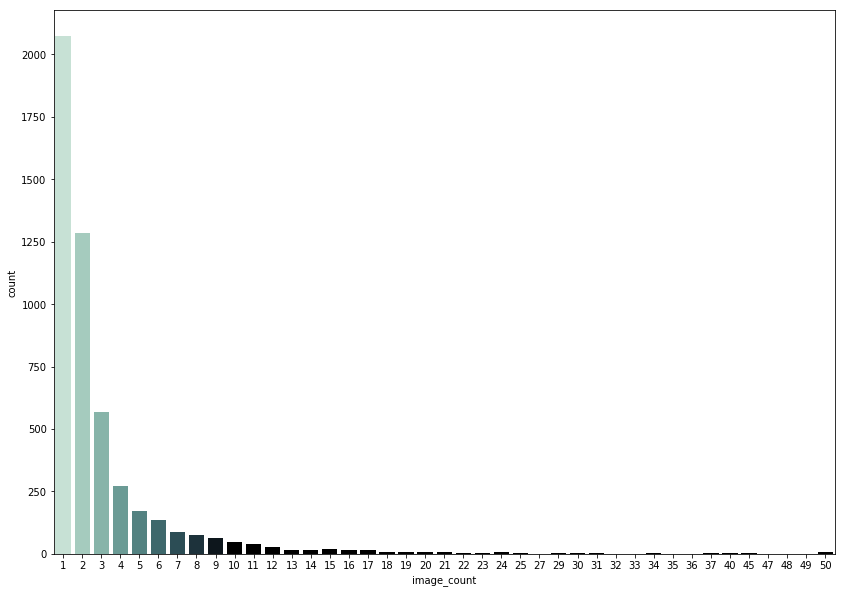

In [5]:
# imbalance
import seaborn as sns
counted = df.groupby("Id").count().rename(columns={"Image":"image_count"})
counted.loc[counted["image_count"] > 50,'image_count'] = 50
plt.figure(figsize = (14, 10))
sns.countplot(data=counted, x="image_count",palette="ch:2.7,-.2,dark=-3")
plt.show()
#sns.distplot(counted["image_count"], norm_hist=True, kde=False, hist_kws={'cumulative': True})


In [7]:
df2 = df.groupby('Id').count().sort_values(by='Image',ascending=False).reset_index()
print(len(df2[df2['Image']<10])/len(df2))
print(df2['Image'][0]/df2['Image'].sum())

0.9452547452547453
0.3810575292772367


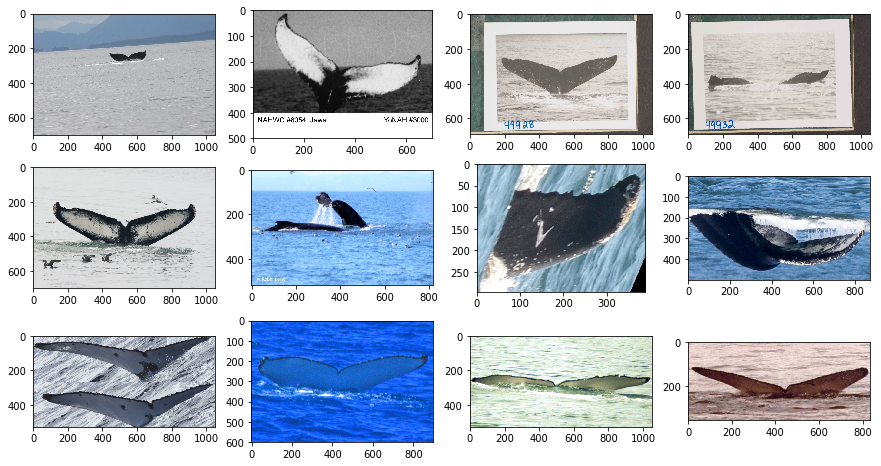

In [8]:
# noises

fig = plt.figure(figsize = (15, 8))
noise_example = ['fe797b5df.jpg','f4117015c.jpg','e2b6d6773.jpg','b3243965d.jpg',
                  'da7e70660.jpg','312c12181.jpg','fde93a87d.jpg','5f37a8fb3.jpg',
                'b11c44221.jpg','f6fff5956.jpg','d5a73d437.jpg','e666f1c5c.jpg']


for idx, img_name in enumerate(noise_example):
    y = fig.add_subplot(3, 4, idx+1)
    img = cv2.imread(os.path.join(path,img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    y.imshow(img)

plt.show()



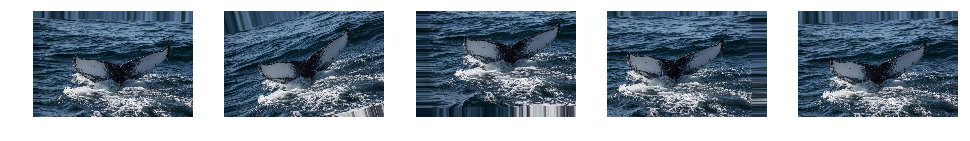

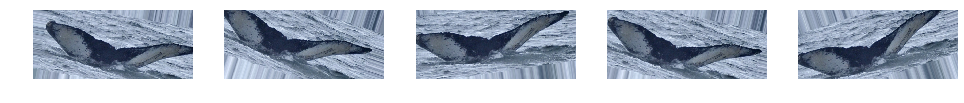

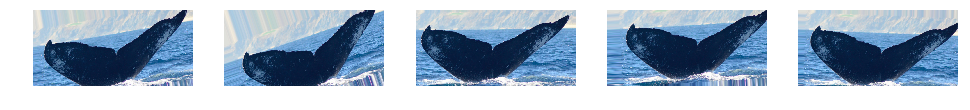

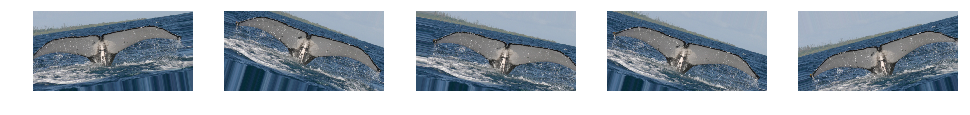

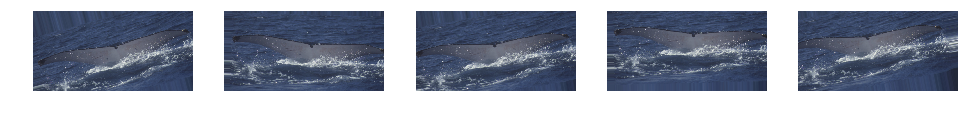

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc, ndimage
import matplotlib.image as mpimg
import keras
import os
from keras import backend as k
from keras.preprocessing.image import ImageDataGenerator
TRAIN = 'train'
path = os.path.abspath(TRAIN)


def plots(ims, figsize=(14,6), rows = 1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows,cols,i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(title[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
        
        
gen = ImageDataGenerator(rotation_range=20, width_shift_range= 0.1, height_shift_range = 0.1)
         
            
for img in os.listdir(path)[:5]:
    image = np.expand_dims(mpimg.imread(os.path.join(path,img)),0)  
    aug_iter = gen.flow(image)
    aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(5)]
    aug_image_names = [str(i)+img for i in range(10)]
    for i in range(5):
        plt.imsave(aug_image_names[i],aug_images[i])
    plots(aug_images, figsize=(20,8),rows=1)

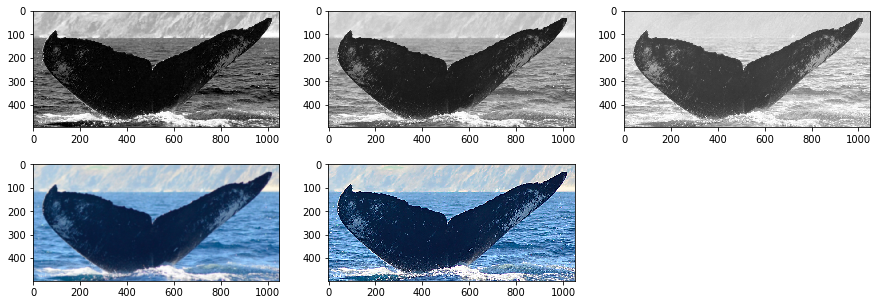

In [11]:
from PIL import ImageFilter
from PIL import Image
from time import time
import matplotlib.pyplot as plt
import os

TRAIN = 'train'
path = os.path.abspath(TRAIN)

plt.figure(figsize = (15, 8))

idx=0
for imagefile in os.listdir(path)[:3]:
    plt.subplot(3, 3, 1)
    fn = os.path.join(path, imagefile)
    im=Image.open(fn)
    im=im.convert("RGB")
    r,g,b=im.split()
    r=r.convert("RGB")
    plt.imshow(r)
    g=g.convert("RGB")
    plt.subplot(3, 3, 2)
    plt.imshow(g)    
    plt.subplot(3, 3, 3)
    b=b.convert("RGB")
    plt.imshow(b)
    plt.subplot(3, 3, 4)
    im_blur=im.filter(ImageFilter.GaussianBlur)
    plt.imshow(im_blur)
    plt.subplot(3, 3, 5)
    im_unsharp=im.filter(ImageFilter.UnsharpMask)
    plt.imshow(im_unsharp)